In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
#import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef

In [2]:
df = pd.read_csv('Heart_Disease_Data.csv', na_values='?')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:

df.shape

(303, 14)

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   cp              303 non-null    int64  
 3   trestbps        303 non-null    int64  
 4   chol            303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalach         303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slop            303 non-null    int64  
 11  ca              299 non-null    float64
 12  thal            301 non-null    float64
 13  pred_attribute  303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [5]:
df['pred_attribute'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: pred_attribute, dtype: int64

In [6]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
df.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                4
thal              2
pred_attribute    0
dtype: int64

In [8]:
df.groupby('pred_attribute')['pred_attribute'].count()

pred_attribute
0    164
1     55
2     36
3     35
4     13
Name: pred_attribute, dtype: int64

In [9]:
df['pred_attribute'] = df['pred_attribute'].astype(bool).astype(int)

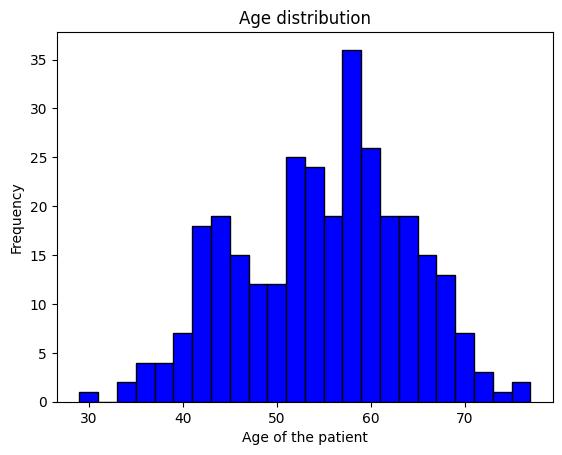

In [10]:
plt.hist(df['age'], color='blue', edgecolor='black', bins=24)
plt.xlabel('Age of the patient')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

In [11]:

df['age'] = (df['age'] - 54.43)/48

men = df['sex'].sum() # '1' indicates male and '0' indicates female
print('There are '+ str(men) + ' males and '+ str(df.shape[0] - men) + ' females in the dataset')

df.groupby('cp')['cp'].count()

There are 206 males and 97 females in the dataset


cp
1     23
2     50
3     86
4    144
Name: cp, dtype: int64

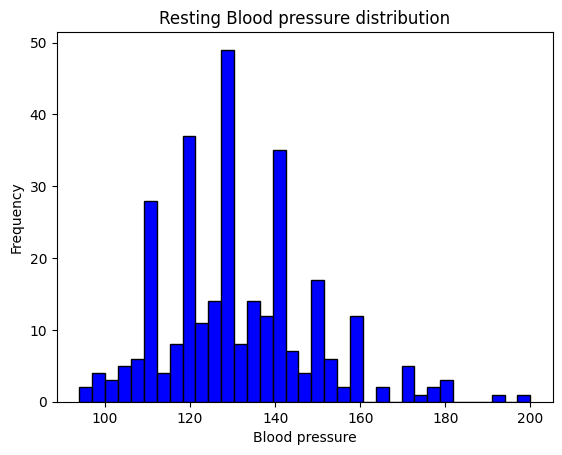

In [12]:
plt.hist(df['trestbps'], color='blue', edgecolor='black', bins=int(106/3))
plt.xlabel('Blood pressure')
plt.ylabel('Frequency')
plt.title('Resting Blood pressure distribution')
plt.show()

In [13]:
df['trestbps'] = (df['trestbps']-131.69)/106

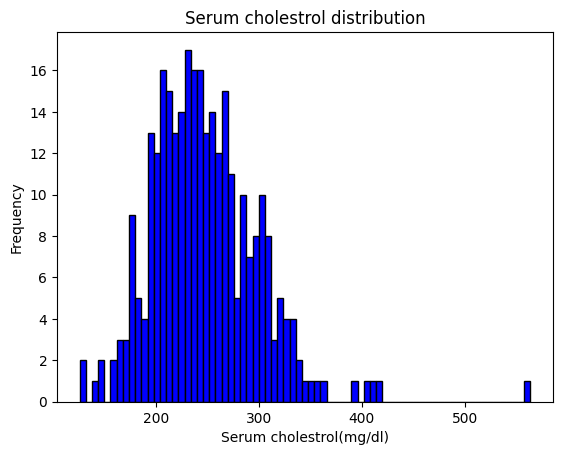

In [14]:
plt.hist(df['chol'], color='blue', edgecolor='black', bins=73)
plt.xlabel('Serum cholestrol(mg/dl)')
plt.ylabel('Frequency')
plt.title('Serum cholestrol distribution')
plt.show()


In [15]:
df['chol'] = (df['chol']-240)/250

In [16]:
diabetic = df['fbs'].sum() # '1' indicates yes and '0' indicates no about resting blood sugar
print('There are '+ str(diabetic) + ' patients who had resting blood sugar > 120 mg/dl out of the '+ str(df.shape[0]) + ' patients')


There are 45 patients who had resting blood sugar > 120 mg/dl out of the 303 patients


In [17]:
df.groupby('restecg')['restecg'].count()

restecg
0    151
1      4
2    148
Name: restecg, dtype: int64

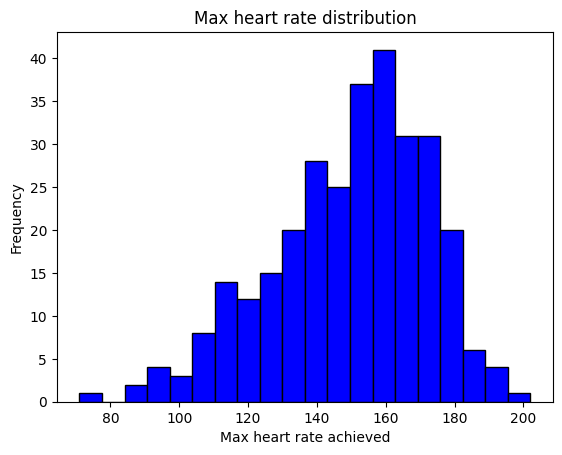

In [18]:
plt.hist(df['thalach'], color='blue', edgecolor='black', bins=20)
plt.xlabel('Max heart rate achieved')
plt.ylabel('Frequency')
plt.title('Max heart rate distribution')
plt.show()


In [19]:
df['thalach'] = (df['thalach'] - 149.6)/131

eig = df['exang'].sum() # '1' indicates yes and '0' indicates no about exercise induced angina
print('There are '+ str(eig) + ' patients who had exercise induced angina out of the '+ str(df.shape[0]) + ' patients')


There are 99 patients who had exercise induced angina out of the 303 patients


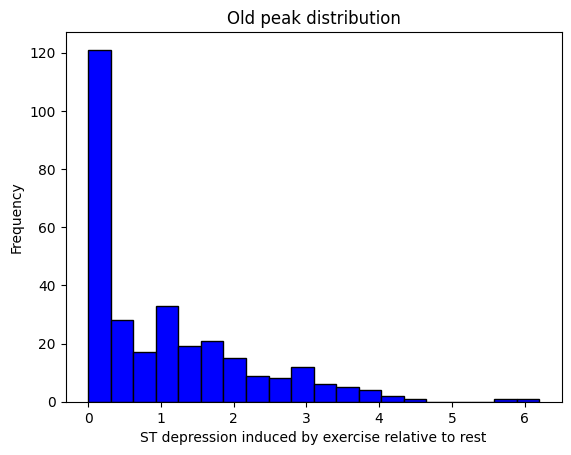

In [20]:

plt.hist(df['oldpeak'], color='blue', edgecolor='black', bins=20)
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Frequency')
plt.title('Old peak distribution')
plt.show()

In [21]:
df['oldpeak'] = (df['oldpeak']-1.04)/6.2

In [22]:
df.groupby('slop')['slop'].count()

slop
1    142
2    140
3     21
Name: slop, dtype: int64

In [23]:
df.groupby('ca')['ca'].count()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [24]:
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

In [25]:
df.groupby('ca')['ca'].count()

ca
0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [26]:
df.groupby('thal')['thal'].count()

thal
3.0    166
6.0     18
7.0    117
Name: thal, dtype: int64

In [27]:
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [28]:
df.groupby('thal')['thal'].count()

df.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
dtype: int64

In [29]:

"""# # ML models"""

y = df['pred_attribute']
df.drop('pred_attribute', axis=1, inplace=True)
x = df

rstate = 100
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=rstate)

print(x.shape, x_train.shape, x_test.shape)

(303, 13) (227, 13) (76, 13)


In [30]:

model = LogisticRegression(solver='lbfgs', multi_class='multinomial',C=1e-2,max_iter=500,tol=20)
model.fit(x_train, y_train)

predictions_lr = model.predict(x_test)
accuracy_score(predictions_lr, y_test) * 100

77.63157894736842

In [31]:
classifier = GaussianNB()
classifier.fit(x_train,y_train)

predictions_gnb = model.predict(x_test)
accuracy_score(predictions_gnb, y_test) * 100

77.63157894736842

In [32]:
model = LinearSVC(max_iter=2000, random_state=rstate)
model.fit(x_train,y_train)

predictions_lsvc = model.predict(x_test)
accuracy_score(predictions_lsvc, y_test) * 100

C:\Python\python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


89.47368421052632

In [33]:
model = tree.DecisionTreeClassifier(random_state=rstate)
model.fit(x_train,y_train)

predictions_dt = model.predict(x_test)
accuracy_score(predictions_dt, y_test) * 100

82.89473684210526

In [34]:
model_rf = RandomForestClassifier(random_state=rstate,max_leaf_nodes=16)
model_rf.fit(x_train, y_train)

predictions_rf = model.predict(x_test)
accuracy_score(predictions_rf, y_test) * 100

82.89473684210526

In [35]:
model.feature_importances_

model = KNeighborsClassifier()
model.fit(x_train,y_train)

predictions_knn = model.predict(x_test)
accuracy_score(predictions_knn, y_test) * 100

88.1578947368421

In [36]:
model = svm.SVC(C=2, random_state=rstate,tol=1)
model.fit(x_train,y_train)

predictions_svm = model.predict(x_test)
accuracy_score(predictions_svm, y_test) * 100

88.1578947368421

<Axes: >

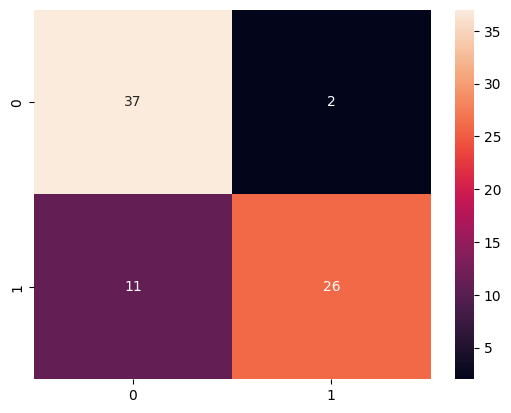

In [37]:
feat_importances = pd.Series(model_rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

CM=confusion_matrix(y_test,predictions_rf)
sns.heatmap(CM, annot=True)

In [38]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, predictions_rf)
acc= accuracy_score(y_test, predictions_rf)
roc=roc_auc_score(y_test, predictions_rf)
prec = precision_score(y_test, predictions_rf)
rec = recall_score(y_test, predictions_rf)
f1 = f1_score(y_test, predictions_rf)

In [39]:
mathew = matthews_corrcoef(y_test, predictions_rf)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])


In [40]:
model_results

data = {        'Logistic Regretion': predictions_lr, 
                'Gaussian NB': predictions_gnb, 
                'Linear SVC': predictions_lsvc,
                'Decision tree': predictions_dt, 
                'KNN': predictions_knn, 
                'SVM':predictions_svm
                }

models = pd.DataFrame(data) 

In [41]:
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

E:\Temp\ipykernel_11524\2695104616.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
E:\Temp\ipykernel_11524\2695104616.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
E:\Temp\ipykernel_11524\2695104616.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
E:\Temp\ipykernel_11524\2695104616.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
E:\Temp\ipykernel_11524\

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.828947,0.928571,0.702703,0.948718,0.800000,0.825710,6.165362,0.674986
1,Logistic Regretion,0.776316,0.812500,0.702703,0.846154,0.753623,0.774428,8.062396,0.555636
2,Gaussian NB,0.776316,0.812500,0.702703,0.846154,0.753623,0.774428,8.062396,0.555636
3,Linear SVC,0.894737,0.939394,0.837838,0.948718,0.885714,0.893278,3.794069,0.793180
4,Decision tree,0.828947,0.928571,0.702703,0.948718,0.800000,0.825710,6.165362,0.674986
5,KNN,0.881579,0.888889,0.864865,0.897436,0.876712,0.881150,4.268327,0.763094
6,SVM,0.881579,0.911765,0.837838,0.923077,0.873239,0.880457,4.268327,0.764901


In [42]:
import pickle

filename='trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))